In [2]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline


Import Pandas, Matplotlib, and Seaborn at the top of your file along with your CSV data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
top100 = pd.read_csv('top100videogamesales.csv', index_col=1)


In [38]:
top100.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Mario Kart Wii,2,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,3,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
New Super Mario Bros.,4,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
Wii Play,5,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


### 1) Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

                     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales
5                     Nintendo    273.32    204.49    122.35        53.03
1                   Activision     94.67     59.91      3.72        21.64
8         Take-Two Interactive     62.48     43.09      3.56        26.62
4       Microsoft Game Studios     53.15     18.39      0.62         5.88
3              Electronic Arts     24.71     47.41      1.38        14.72
7  Sony Computer Entertainment     21.77     17.10      6.91        13.20
9                      Ubisoft     19.54     11.28      0.01         3.14
2           Bethesda Softworks     10.05      8.72      0.59         3.00
0                    505 Games      3.50      2.64      0.00         0.67
6                         Sega      2.58      3.90      0.66         0.91




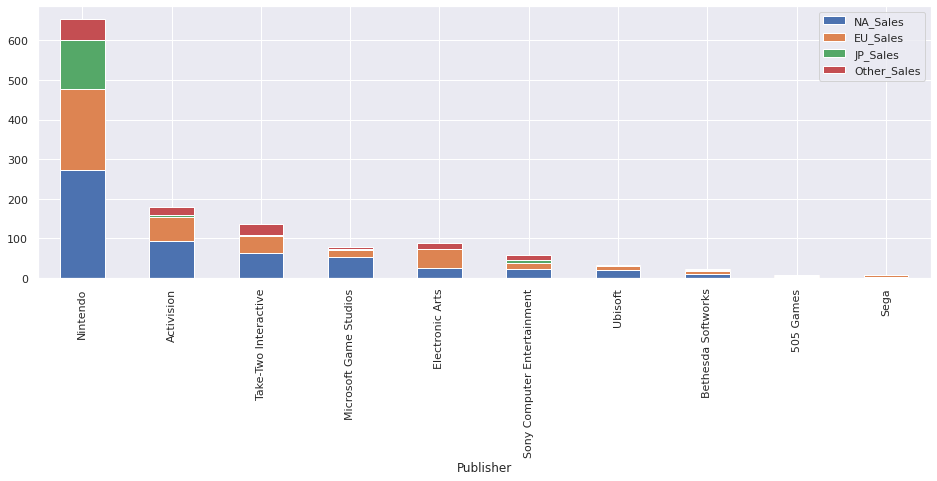

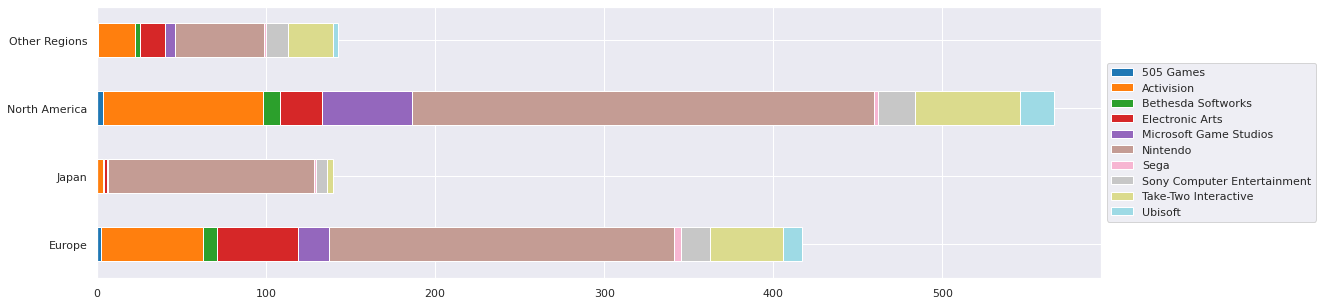

In [32]:
sales = top100.groupby("Publisher")[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Publisher" ]].sum().reset_index()
sales = sales.sort_values(by=['NA_Sales'], ascending=False)
print(sales)
print()
sales[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Publisher"]].plot(x="Publisher", kind="bar",  figsize=(16,5), stacked=True)
print()
table = pd.pivot_table(sales, columns='Publisher', values=["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], aggfunc='sum')
table.plot(stacked=True, kind='barh', colormap="tab20", figsize=(18,5) )
plt.yticks([0, 1, 2, 3],  ['Europe', 'Japan', 'North America',  "Other Regions"])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Answer ) 
As shown in the table and  stacked chart above, Nintendo (salmon/brownish color) dominates sales in every region, with Activision (bright orange) arriving second best.

### 2) Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Year
2006    167.44
2009    141.83
2010    130.86
2005    110.36
2011    104.97
2008     92.42
2013     88.03
2007     87.92
2012     79.91
2004     68.77
2014     51.91
2015     44.66
2001     43.20
2002     38.83
2003     14.15
Name: Global_Sales, dtype: float64


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

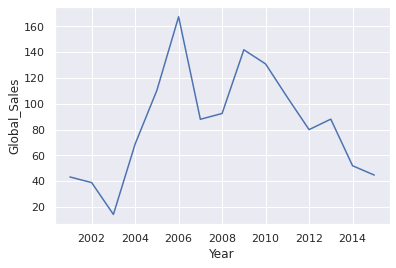

In [6]:
totalsale = top100.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)
print(totalsale)
sns.lineplot(data=totalsale)

### Answer ) 
As shown in the table and line chart above, the total global sales reached its peak on 2006, falling in 2007 and 2008, having a second smaller peak in 2009 to then have a descending tendency until the end of the series.


### 3 ) Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

Name
Grand Theft Auto V                        21.40
Grand Theft Auto: San Andreas             20.81
Grand Theft Auto V                        16.38
Grand Theft Auto: Vice City               16.15
Grand Theft Auto III                      13.10
Grand Theft Auto V                        11.98
Pokemon HeartGold/Pokemon SoulSilver      11.90
Grand Theft Auto IV                       11.02
Grand Theft Auto IV                       10.57
FIFA Soccer 13                             8.24
Grand Theft Auto: Liberty City Stories     7.72
The Legend of Zelda: Twilight Princess     7.31
Uncharted 3: Drake's Deception             6.83
Uncharted 2: Among Thieves                 6.73
Red Dead Redemption                        6.60
Name: Global_Sales, dtype: float64

There are 15 action games on the list



<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

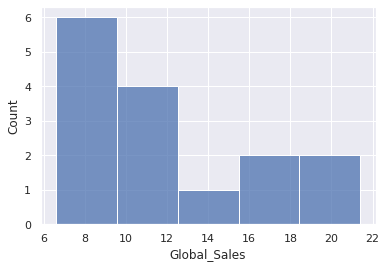

In [37]:
action = top100.loc[(top100['Genre'] == "Action")]
globalsales = action["Global_Sales"]
print(globalsales)
print()
print(f'There are', globalsales.size , 'action games on the list')
print()

sns.histplot(data=globalsales)

### Answer ) 
As shown in table and histogram, the majority of action games had their global sales between around 6.5 and and 12 (that is, 10 games), there is one game with global sales between 13 and 15, two games with global sales between 15 and 18 and two games above that. 

### 4 ) North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

          Genre  NA_Sales
6       Shooter    140.44
8        Sports     84.87
0        Action     77.81
1          Misc     70.60
4        Racing     56.45
3      Platform     52.67
5  Role-Playing     50.48
2        Others     17.84
7    Simulation     14.61



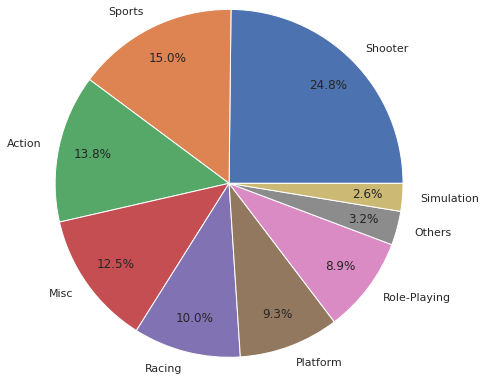

In [16]:
na_sales = top100.copy()
na_sales = na_sales.groupby('Genre')['NA_Sales'].sum().reset_index()
na_sales.loc[(na_sales["NA_Sales"] < 14.5), 'Genre'] = 'Others'
na_sales = na_sales.groupby('Genre')['NA_Sales'].sum().reset_index()
na_sales = na_sales.sort_values(by=['NA_Sales'],  ascending=False)
print(na_sales)
print()
plt.pie(na_sales['NA_Sales'], labels=na_sales['Genre'], autopct='%1.1f%%',pctdistance=0.8, labeldistance=1.1, radius=2);

### Answer ) 
As shown in the table and pie chart, in North America shooter games sales are at the top, with sports games coming  second place. Comparing percentages, it is possible to see that there is a 10% difference between 1st and 2nd place. 


### 5 )  European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.


          Genre  EU_Sales
8        Sports     82.18
6       Shooter     81.63
0        Action     58.15
1          Misc     48.00
4        Racing     44.03
5  Role-Playing     36.20
3      Platform     33.12
7    Simulation     23.26
2        Others     10.36


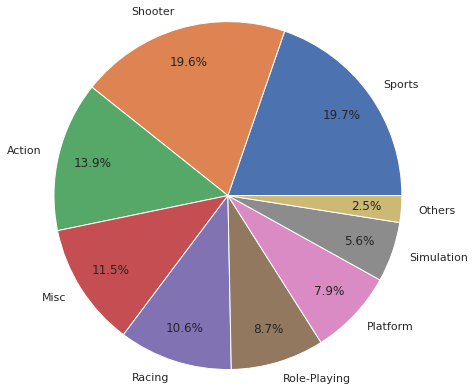

In [17]:
eu_sales = top100.copy()
eu_sales = eu_sales.groupby('Genre')['EU_Sales'].sum().reset_index()
eu_sales.loc[(eu_sales["EU_Sales"] < 6), 'Genre'] = 'Others'
eu_sales = eu_sales.groupby('Genre')['EU_Sales'].sum().reset_index()
eu_sales = eu_sales.sort_values(by=['EU_Sales'],  ascending=False)
print(eu_sales)
plt.pie(eu_sales['EU_Sales'], labels=eu_sales['Genre'],autopct='%1.1f%%',pctdistance=0.8, labeldistance=1.1, radius=2);

### Answer ) 
As shown in the table and pie chart, in Europe sport games sales are at the top, with shooter games coming second place. Comparing percentages, it is possible to see that there is only a 1% difference between 1st and 2nd place. 


### 6) Explain differences and similarities between the North American and European charts in markdown.


### Answer ) 
As shown in the pie charts and tables above, in North America shooter games sales are at the first  place, sports coming second place. In Europe, this order is reversed -  althought the difference between shooter and sport sales is smaller. However, only analysing the pie chart can be misleading - the table analysis is vital here as it shows that shooter games sales in North America are almost the double than in Europe.


### 7 )  Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

Nintendo       46
PlayStation    34
XBox           19
Other           1
Name: Platform, dtype: int64


<AxesSubplot:>

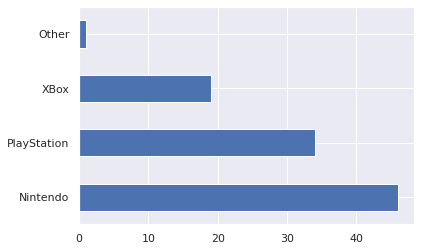

In [956]:
games = top100.Platform.value_counts()
print(games)
games.plot( kind='barh', x="Platform" )

### Answer ) 
As shown in the table and chart above, most games were created by Nintendo (more than the double of Xbox games)
